In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from download import download
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import os

In [2]:
data = pd.read_csv("ag.csv", header=1, parse_dates=["Price Date"])
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26


In [3]:
data_agra = data[data["Market Name"] == "Agra"]
data_agra.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
306,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960,2020-12-31
307,308,Agra,Agra,Potato,Desi,FAQ,800,1050,940,2020-12-30
308,309,Agra,Agra,Potato,Desi,FAQ,800,1080,950,2020-12-29
309,310,Agra,Agra,Potato,Desi,FAQ,800,1100,950,2020-12-28
310,311,Agra,Agra,Potato,Desi,FAQ,850,1100,980,2020-12-26


In [4]:
data_agra.rename(columns={"Max Price (Rs./Quintal)" : "Price", 
                         "Price Date": "Date"}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
data_agra_index =data_agra.set_index('Date')
data_agra_index.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Price,Modal Price (Rs./Quintal)
Date,,,,,,,,,
2020-12-31,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960
2020-12-30,308,Agra,Agra,Potato,Desi,FAQ,800,1050,940
2020-12-29,309,Agra,Agra,Potato,Desi,FAQ,800,1080,950
2020-12-28,310,Agra,Agra,Potato,Desi,FAQ,800,1100,950
2020-12-26,311,Agra,Agra,Potato,Desi,FAQ,850,1100,980


In [6]:
data1 = data_agra_index.drop(["Modal Price (Rs./Quintal)", "Min Price (Rs./Quintal)", "Grade", "Variety", "Commodity", "Market Name", "District Name", "Sl no."], axis=1)
data1.head(2)

,Price
Date,
2020-12-31,1100
2020-12-30,1050


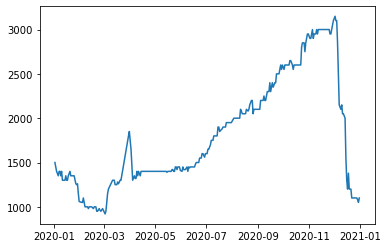

In [20]:
plt.plot(data1)

## Ckeck Stationarity

In [67]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data1["Price"])

print(f'Test Stats: {result[0]}')
print(f"P-Value: {result[1]}")
print(f"Critical Value: {result[4]}")

if result[1] > 0.05:
    print("\nSeries is not Stationary")
else:
    print("\nseries is stationary")
    
    
# test stats always prefer to be good if it's lower

Test Stats: -1.937509615828977
P-Value: 0.3146262626557268
Critical Value: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

Series is not Stationary


In [15]:
pip install pmdarima

  Using cached pmdarima-1.8.4-cp38-cp38-win_amd64.whl (600 kB)
Note: you may need to restart the kernel to use updated packages.


## Making Stationary 

In [17]:
# pip install pmdarima
# it is usefull for find what will be my stationary diff

In [18]:
import statsmodels.api as sm
import pmdarima as pm

In [21]:
pm.arima.ndiffs(data1["Price"], alpha=0.05, test='kpss', max_d=4)

1

here we can see that pmdarima said that we have to diff for 1 order

## Removing Trend

### Differencing

#### Shift 

In [53]:
data1["shift_1"] = data1["Price"].shift(1)
data1["diff"] = data1["Price"] - data1["Price"].shift()
data1

,Price,shift_1,diff
Date,,,
2020-12-31,1100,NaN,NaN
2020-12-30,1050,1100.0,-50.0
2020-12-29,1080,1050.0,30.0
2020-12-28,1100,1080.0,20.0
2020-12-26,1100,1100.0,0.0
...,...,...,...
2020-01-07,1400,1400.0,0.0
2020-01-06,1350,1400.0,-50.0
2020-01-04,1400,1350.0,50.0


we are shifting here by one so in arima model in p,d,q parameter d will be 1

<AxesSubplot:xlabel='Date'>

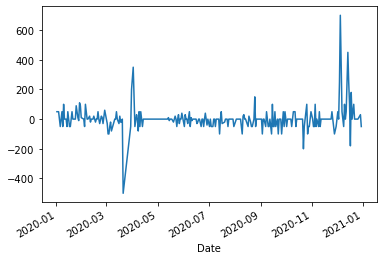

In [54]:
data1["diff"].plot()

#### Youtube

<AxesSubplot:xlabel='Date'>

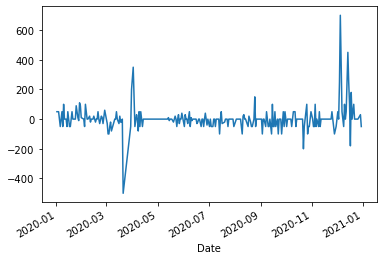

In [46]:
#We are doing same thing but I could not get the below COde

lag_d = data1["Price"].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
lag_d.plot()

In [52]:
lag_d

Date
2020-12-30   -50.0
2020-12-29    30.0
2020-12-28    20.0
2020-12-26     0.0
2020-12-25     0.0
              ... 
2020-01-07     0.0
2020-01-06   -50.0
2020-01-04    50.0
2020-01-03    50.0
2020-01-02    50.0
Name: Price, Length: 284, dtype: float64

### From Smoothing Tech

In [61]:
smooth = data1["Price"] - data1["Price"].rolling(window=2).mean()
smooth

Date
2020-12-31     NaN
2020-12-30   -25.0
2020-12-29    15.0
2020-12-28    10.0
2020-12-26     0.0
              ... 
2020-01-07     0.0
2020-01-06   -25.0
2020-01-04    25.0
2020-01-03    25.0
2020-01-02    25.0
Name: Price, Length: 285, dtype: float64

<AxesSubplot:xlabel='Date'>

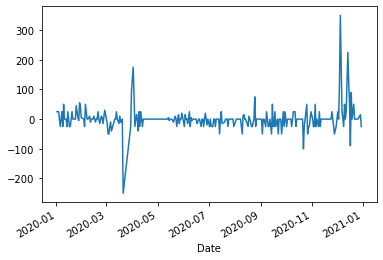

In [62]:
smooth.plot()

## Removing Seasonality

#### Shifting Method

In [68]:
# data1["shift_1"] = data1["Price"].shift(12)    
# data1["diff"] = data1["Price"] - data1["Price"].shift()
# data1



# although my recent dataset has not any seasonality but I'm assuming that it has seasonality

#  here we give 12 data became seasonal after 12 month.
#here I assuming that my dataset is montly and seasondlity occures in every year or after 12 month
# if dataset is hourly and seasonalty occures in evry year then that will be 24*365=8760

## Removing Variance

**1. data1["trans"] = np.sqrt(data1)**

**2. data1["trans"] = np.cbrt(data1)**

**3. data1["trans"] = np.log(data1)**

These are the common Transformation technique to remove variance from data.

You have to always remember that all the transformation go along with diff tech. and you have to always invert the function like (np.log -> np.exp) to get original series

In [69]:
data1

,Price,shift_1,diff
Date,,,
2020-12-31,1100,NaN,NaN
2020-12-30,1050,1100.0,-50.0
2020-12-29,1080,1050.0,30.0
2020-12-28,1100,1080.0,20.0
2020-12-26,1100,1100.0,0.0
...,...,...,...
2020-01-07,1400,1400.0,0.0
2020-01-06,1350,1400.0,-50.0
2020-01-04,1400,1350.0,50.0


In [71]:
data1["Trans"] = np.log(data1["Price"])
data1["Trans_shift"] = data1["Trans"] - data1["Trans"].shift(1)

In [72]:
data1

,Price,shift_1,diff,Trans,Trans_shift
Date,,,,,
2020-12-31,1100,NaN,NaN,7.003065,NaN
2020-12-30,1050,1100.0,-50.0,6.956545,-0.046520
2020-12-29,1080,1050.0,30.0,6.984716,0.028171
2020-12-28,1100,1080.0,20.0,7.003065,0.018349
2020-12-26,1100,1100.0,0.0,7.003065,0.000000
...,...,...,...,...,...
2020-01-07,1400,1400.0,0.0,7.244228,0.000000
2020-01-06,1350,1400.0,-50.0,7.207860,-0.036368
2020-01-04,1400,1350.0,50.0,7.244228,0.036368


<AxesSubplot:xlabel='Date'>

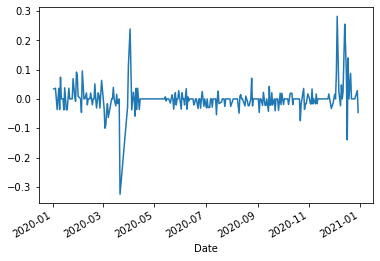

In [76]:
data1["Trans_shift"].plot()

### Checking By ADF

In [73]:
data_mod = data1.dropna()
data_mod

,Price,shift_1,diff,Trans,Trans_shift
Date,,,,,
2020-12-30,1050,1100.0,-50.0,6.956545,-0.046520
2020-12-29,1080,1050.0,30.0,6.984716,0.028171
2020-12-28,1100,1080.0,20.0,7.003065,0.018349
2020-12-26,1100,1100.0,0.0,7.003065,0.000000
2020-12-25,1100,1100.0,0.0,7.003065,0.000000
...,...,...,...,...,...
2020-01-07,1400,1400.0,0.0,7.244228,0.000000
2020-01-06,1350,1400.0,-50.0,7.207860,-0.036368
2020-01-04,1400,1350.0,50.0,7.244228,0.036368


In [66]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_mod["diff"])

print(f'Test Stats: {result[0]}')
print(f"P-Value: {result[1]}")
print(f"Critical Value: {result[4]}")

if result[1] > 0.05:
    print("\nSeries is not Stationary")
else:
    print("\nseries is stationary")

Test Stats: -4.312315258383146
P-Value: 0.00042289765500379766
Critical Value: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

series is stationary


In [74]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_mod["Trans_shift"])

print(f'Test Stats: {result[0]}')
print(f"P-Value: {result[1]}")
print(f"Critical Value: {result[4]}")

if result[1] > 0.05:
    print("\nSeries is not Stationary")
else:
    print("\nseries is stationary")

Test Stats: -4.331054866795724
P-Value: 0.00039230883448781073
Critical Value: {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}

series is stationary
